## Creating dataset for training

|sensor_task|usual_range|unit|
|----------|:-------:|-------|
|temperature | -6 to 30| C|
| humidity | 0 to 100| %|
| pressure | 950 to 1012| mbar|
| wind_speed |0 to 10|m/s|
| visibility |0 to 50|km|
| cloudiness |0 to 100| %|
| dew_point | 0 to |

In [1]:

#### ! This Jupyter Notebook was created by Amit Amola
#### ! Cannot be run on Pi

import pandas as pd
import numpy as np

def frosty_vals():
    """
    Function to return temp, humidity, pressure, wind_speed, visibility
    and cloudiness values when frosty
    """
    temp = np.random.randint(-6, 0)
    humidity = np.random.randint(80, 100)
    pressure = np.random.randint(950, 1000)
    wind_speed = np.random.randint(0, 3)
    visibility = np.random.randint(0, 2)
    cloudiness = np.random.randint(50, 100)
    dew_point = np.random.randint(1, 4)
    return temp, humidity, pressure, wind_speed, visibility, cloudiness, dew_point

def dew_vals():
    """
    Function to return temp, humidity, pressure, wind_speed, visibility
    and cloudiness values when dew
    """
    temp = np.random.randint(0, 7)
    humidity = np.random.randint(80, 100)
    pressure = np.random.randint(950, 1000)
    wind_speed = np.random.randint(0, 3)
    visibility = np.random.randint(1, 3)
    cloudiness = np.random.randint(50, 100)
    dew_point = temp
    return temp, humidity, pressure, wind_speed, visibility, cloudiness, dew_point

def low_rain_vals():
    """
    Function to return temp, humidity, pressure, wind_speed, visibility
    and cloudiness values when low_rain
    """
    temp = np.random.randint(8, 27)
    humidity = np.random.randint(80, 100)
    pressure = np.random.randint(930, 1000)
    wind_speed = np.random.randint(2, 10)
    visibility = np.random.randint(5, 8)
    cloudiness = np.random.randint(60, 80)
    dew_point = np.random.randint(1, 4)
    return temp, humidity, pressure, wind_speed, visibility, cloudiness, dew_point

def heavy_rain_vals():
    """
    Function to return temp, humidity, pressure, wind_speed, visibility
    and cloudiness values when heavy_rain
    """
    temp = np.random.randint(8, 27)
    humidity = np.random.randint(80, 100)
    pressure = np.random.randint(900, 930)
    wind_speed = np.random.randint(2, 20)
    visibility = np.random.randint(3, 6)
    cloudiness = np.random.randint(75, 100)
    dew_point = np.random.randint(1, 4)
    return temp, humidity, pressure, wind_speed, visibility, cloudiness, dew_point

def nothing_vals():
    """
    Function to return temp, humidity, pressure, wind_speed, visibility
    and cloudiness values when nothing
    """
    temp = np.random.randint(8, 27)
    humidity = np.random.randint(0, 50)
    pressure = np.random.randint(1030, 1100)
    wind_speed = np.random.randint(0, 8)
    visibility = np.random.randint(20, 50)
    cloudiness = np.random.randint(0, 40)
    dew_point = np.random.randint(1, 4)
    return temp, humidity, pressure, wind_speed, visibility, cloudiness, dew_point


from random import choice

y_var = ['heavy_rain', 'low_rain', 'frosty', 'nothing', 'nothing', 'dew']

outcome = [y_var[val] for val in np.random.randint(0,len(y_var), 40000)]

dicty = {'nothing':nothing_vals(), 'heavy_rain': heavy_rain_vals(),
         'low_rain':low_rain_vals(), 'frosty': frosty_vals(), 'dew':dew_vals()}

final_vals = []
for i, val in enumerate(outcome):
    if i%20==0:
        final_vals.append(dicty[choice(['nothing', 'heavy_rain', 'low_rain', 
                                        'frosty', 'dew', 'nothing'])])
    else:
        final_vals.append(dicty[val])

In [2]:
#Convert final_vals to dataframe and add outcome column
df = pd.DataFrame(final_vals, columns=['temp', 'humidity', 'pressure', 
                                       'wind_speed', 'visibility', 'cloudiness', 
                                       'dew_point'])
df['outcome'] = outcome

### Training a Decision Tree Model

In [3]:
df.head()

,temp,humidity,pressure,wind_speed,visibility,cloudiness,dew_point,outcome
0,18,28,1071,6,38,1,3,heavy_rain
1,18,28,1071,6,38,1,3,nothing
2,18,28,1071,6,38,1,3,nothing
3,18,88,949,6,5,71,3,low_rain
4,23,92,902,17,3,77,2,heavy_rain


In [4]:
df.to_csv('data_to_train.csv', index=False)

## Training a Decision Tree Model

In [26]:
#Training Decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('outcome', axis=1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(criterion='gini')
# dt = RandomForestClassifier(n_estimators=10)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9615833333333333


In [29]:
dt.feature_importances_

array([0.        , 0.21279193, 0.3596658 , 0.        , 0.21610494,
       0.        , 0.21143734])

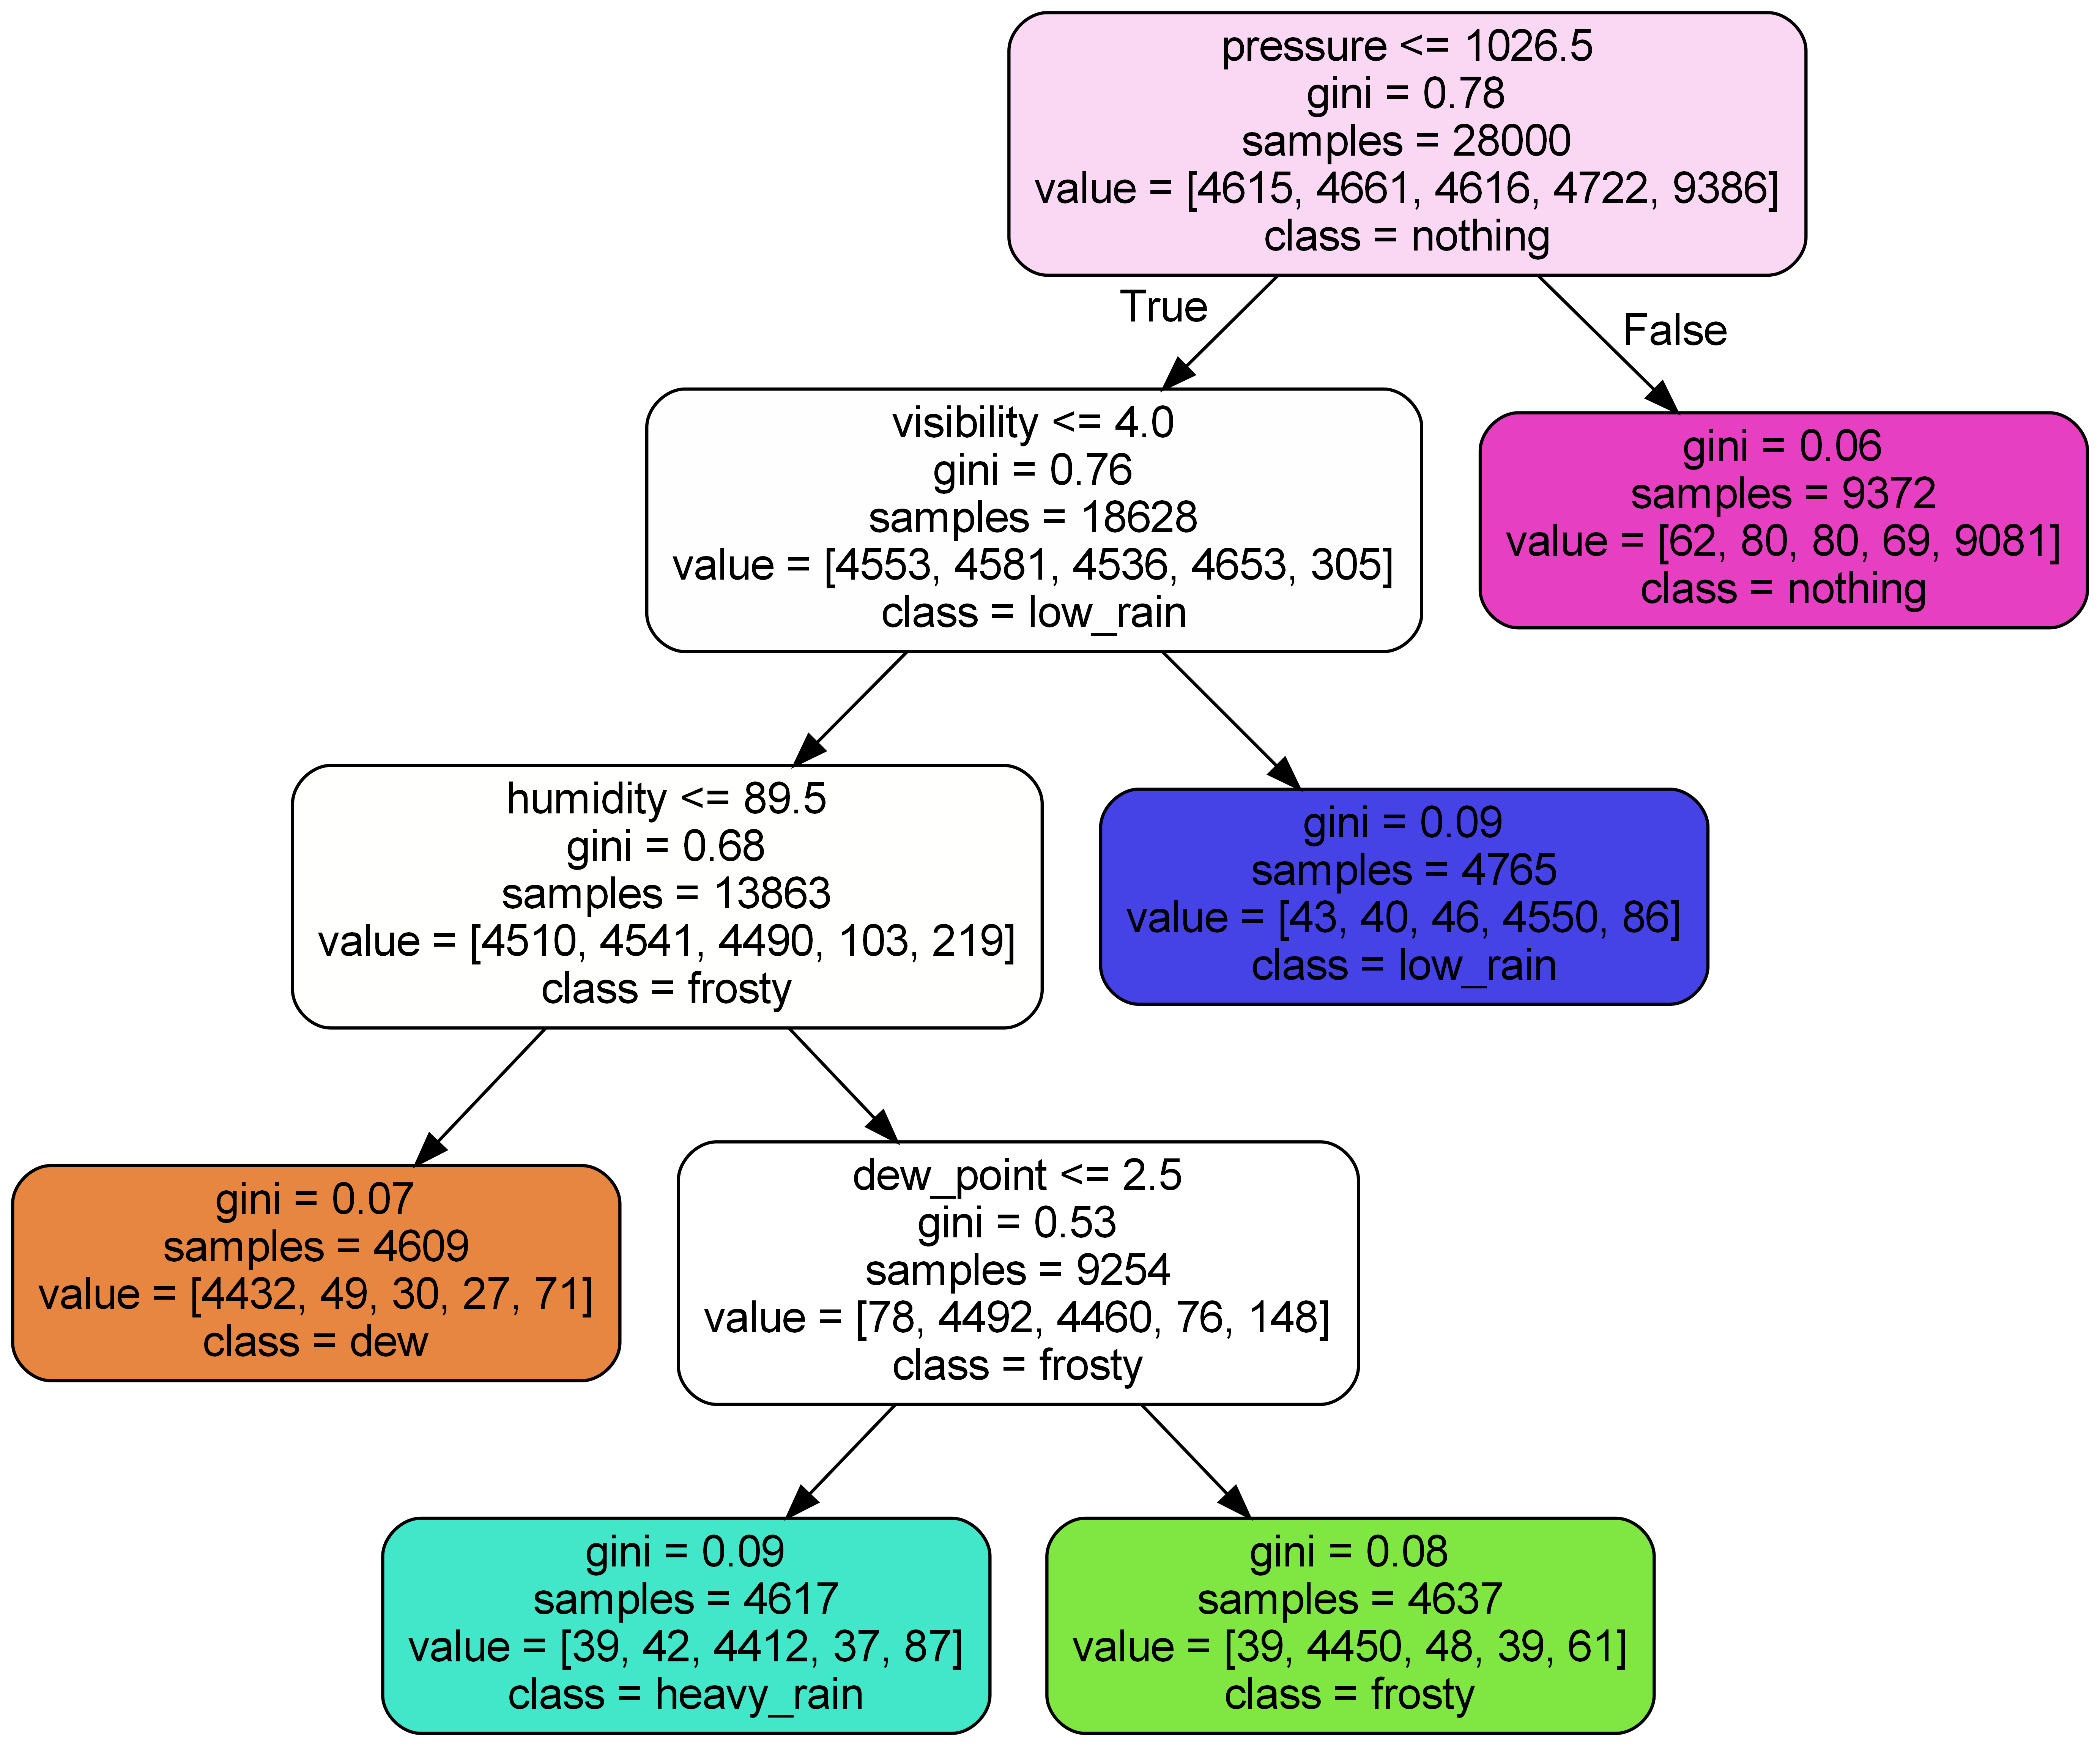

In [32]:
export_graphviz(dt, out_file='tree.dot', 
                feature_names = list(dt.feature_names_in_),
                class_names = np.array(dt.classes_),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [33]:
from sklearn import tree

text_representation = tree.export_text(dt, feature_names=list(dt.feature_names_in_), )
print(text_representation)

|--- pressure <= 1026.50
|   |--- visibility <= 4.00
|   |   |--- humidity <= 89.50
|   |   |   |--- class: dew
|   |   |--- humidity >  89.50
|   |   |   |--- dew_point <= 2.50
|   |   |   |   |--- class: heavy_rain
|   |   |   |--- dew_point >  2.50
|   |   |   |   |--- class: frosty
|   |--- visibility >  4.00
|   |   |--- class: low_rain
|--- pressure >  1026.50
|   |--- class: nothing



In [34]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [35]:
rules = get_rules(dt, list(X.columns), list(dt.classes_))
for r in rules:
    print(r)

if (pressure > 1026.5) then class: nothing (proba: 96.9%) | based on 9,372 samples
if (pressure <= 1026.5) and (visibility > 4.0) then class: low_rain (proba: 95.49%) | based on 4,765 samples
if (pressure <= 1026.5) and (visibility <= 4.0) and (humidity > 89.5) and (dew_point > 2.5) then class: frosty (proba: 95.97%) | based on 4,637 samples
if (pressure <= 1026.5) and (visibility <= 4.0) and (humidity > 89.5) and (dew_point <= 2.5) then class: heavy_rain (proba: 95.56%) | based on 4,617 samples
if (pressure <= 1026.5) and (visibility <= 4.0) and (humidity <= 89.5) then class: dew (proba: 96.16%) | based on 4,609 samples


# Rules in if and else

```        if temp_dict['visibility'] > 53.0:
            return "No need to actuate"
        elif temp_dict['visibility'] <= 53.0 and temp_dict['pressure'] <= 944.5:
            return 'Signs of heavy_rain, spreading CaCl2.'
        elif temp_dict['visibility'] <= 53.0 and temp_dict['pressure'] > 944.5 and temp_dict['wind_speed'] > 5.0:
            return 'Possibility of small drizzle, spreading Ca(NO3)2.'
        elif temp_dict['visibility'] <= 53.0 and temp_dict['pressure'] > 944.5 and temp_dict['wind_speed'] <= 5.0 and temp_dict['temperature'] > -0.5:
            return 'Temperature is at dew_point, spreading Anti_dew_spray.'
        else:# self.visibility <= 53.0 and self.pressure > 944.5 and self.wind_speed <= 5.0 and self.temp <= -0.5:
            return 'Weather indicates onset of frost, spraying anti_frost_spray.'    ```

## Save the model using pickle as saved_model.pkl

In [222]:
import pickle

with open('saved_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

#Load the model using pickle
with open('saved_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

#Predict using the loaded model
loaded_model.predict([[-2, 40, 1000, 20, 10, 40, 3]])

C:\Users\amita\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['low_rain'], dtype=object)

In [223]:
X.columns

Index(['temp', 'humidity', 'pressure', 'wind_speed', 'visibility',
       'cloudiness', 'dew_point'],
      dtype='object')

In [224]:
temp = np.random.randint(0, 4)
humidity = np.random.randint(20, 75)
pressure = np.random.randint(980, 1100)
wind_speed = np.random.randint(0, 5)
visibility = np.random.randint(10, 20)
cloudiness = np.random.randint(60, 100)
dew_point = temp

In [225]:
loaded_model.predict([[3, 50, 1000, 2, 15, 65, 3]])

C:\Users\amita\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['dew'], dtype=object)